In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/My Drive/CarRentalDataV1.csv'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.columns

Index(['fuelType', 'rating', 'renterTripsTaken', 'reviewCount',
       'location.city', 'location.country', 'location.latitude',
       'location.longitude', 'location.state', 'owner.id', 'rate.daily',
       'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year',
       'airportcity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   float64
 3   reviewCount         5851 non-null   float64
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   float64
 10  rate.daily          5851 non-null   float64
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   float64
 15  airportcity         5851 non-null   object 
dtypes: flo

In [ ]:
df.shape

(5851, 16)

In [ ]:
df.isnull().sum()

,0
fuelType,75
rating,501
renterTripsTaken,0
reviewCount,0
location.city,0
location.country,0
location.latitude,0
location.longitude,0
location.state,0
owner.id,0


In [ ]:
df.fuelType.value_counts()

,count
fuelType,
GASOLINE,4810
ELECTRIC,622
HYBRID,274
DIESEL,70


In [ ]:
df['fuelType'] = df['fuelType'].fillna('GASOLINE')

In [ ]:
df.isnull().sum()

,0
fuelType,0
rating,501
renterTripsTaken,0
reviewCount,0
location.city,0
location.country,0
location.latitude,0
location.longitude,0
location.state,0
owner.id,0


In [ ]:
df1 = df.dropna()

In [ ]:
df1.isnull().sum()

,0
fuelType,0
rating,0
renterTripsTaken,0
reviewCount,0
location.city,0
location.country,0
location.latitude,0
location.longitude,0
location.state,0
owner.id,0


# Univariant Analysis

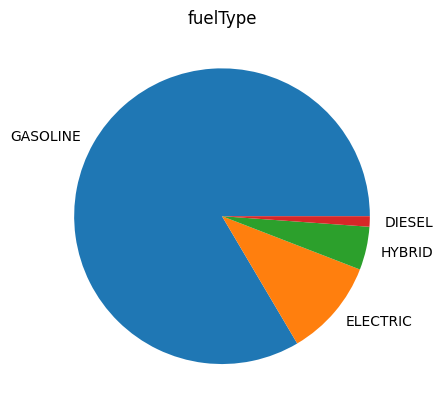

In [ ]:
labels=df1['fuelType'].value_counts().index
values=df1['fuelType'].value_counts().values


plt.pie(values ,labels = labels)
plt.title('fuelType')
plt.show()

<Axes: xlabel='rating'>

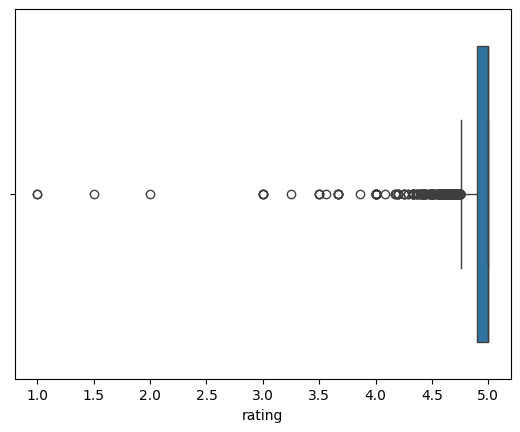

In [ ]:
sns.boxplot(x='rating', data=df1)

<Axes: xlabel='renterTripsTaken'>

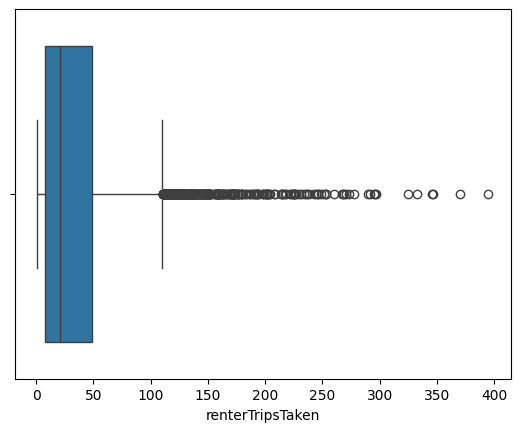

In [ ]:
sns.boxplot(x='renterTripsTaken', data=df1)

In [ ]:
# TOp states where the rental cars are taken
df['location.state'].value_counts().sort_values()[:-10:-1]

,count
location.state,
CA,966
FL,836
TX,499
CO,238
NV,233
GA,230
AZ,223
NC,219
NJ,211


Text(0, 0.5, 'Count')

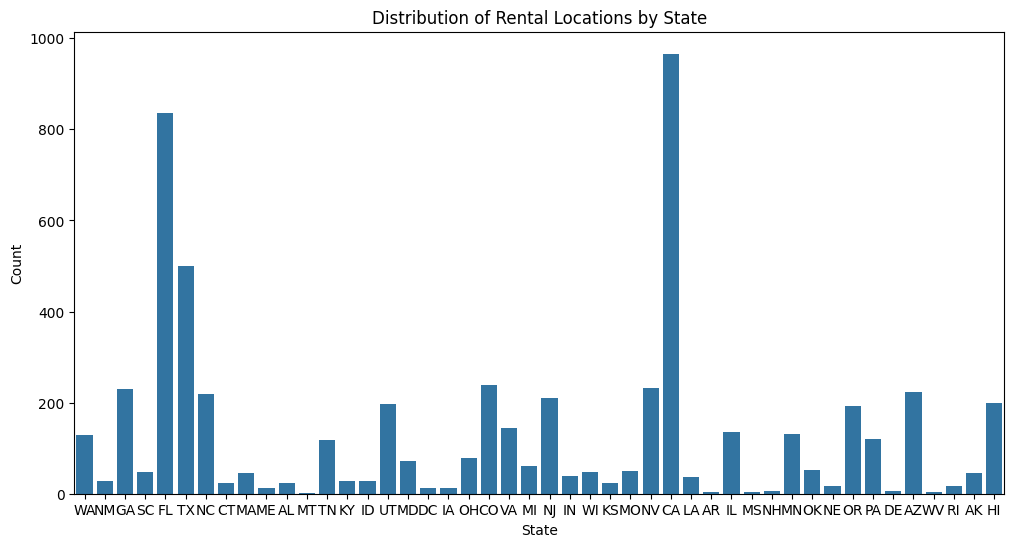

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='location.state', data=df)
plt.title('Distribution of Rental Locations by State')
plt.xlabel('State')
plt.ylabel('Count')

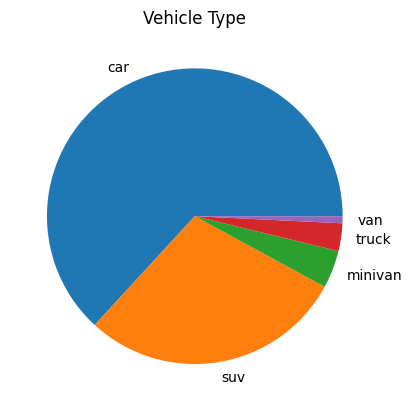

In [ ]:
labels=df1['vehicle.type'].value_counts().index
values=df1['vehicle.type'].value_counts().values

plt.pie(values ,labels = labels)
plt.title('Vehicle Type')
plt.show()

Text(0, 0.5, 'Count')

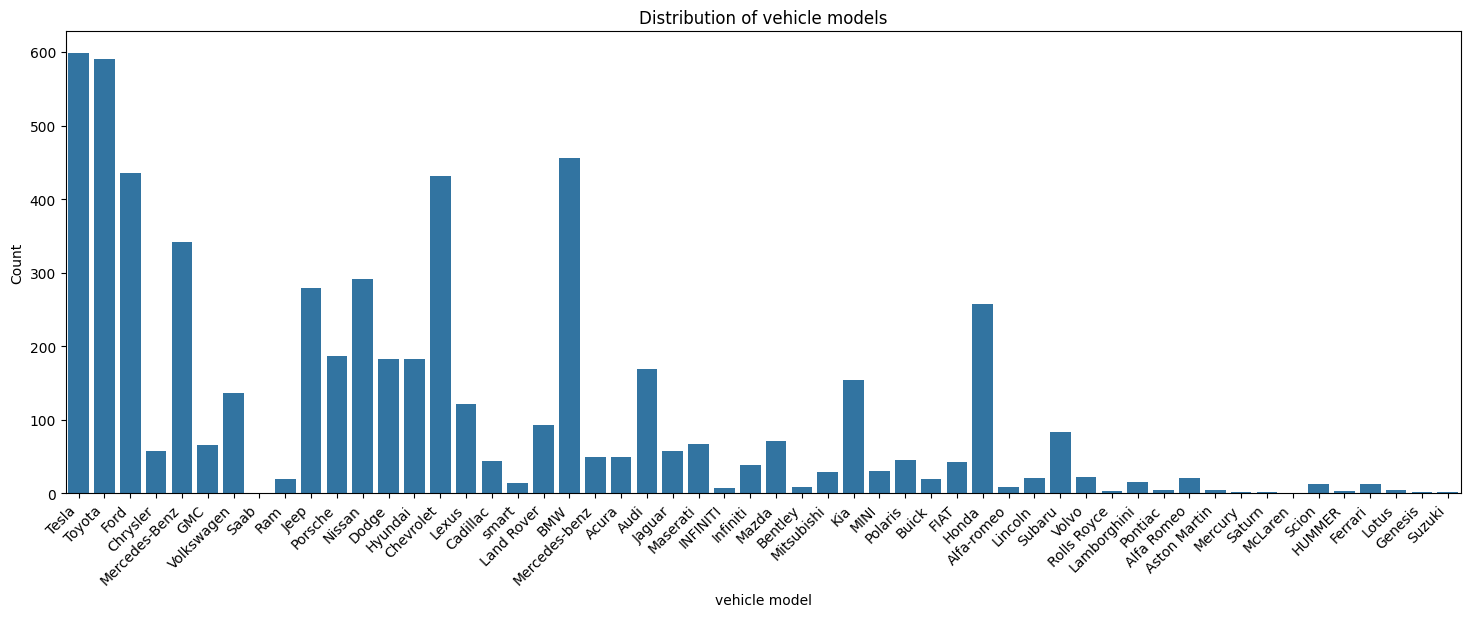

In [ ]:
plt.figure(figsize=(18, 6))

sns.countplot(x='vehicle.make', data=df)
plt.title('Distribution of vehicle models')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('vehicle model')
plt.ylabel('Count')

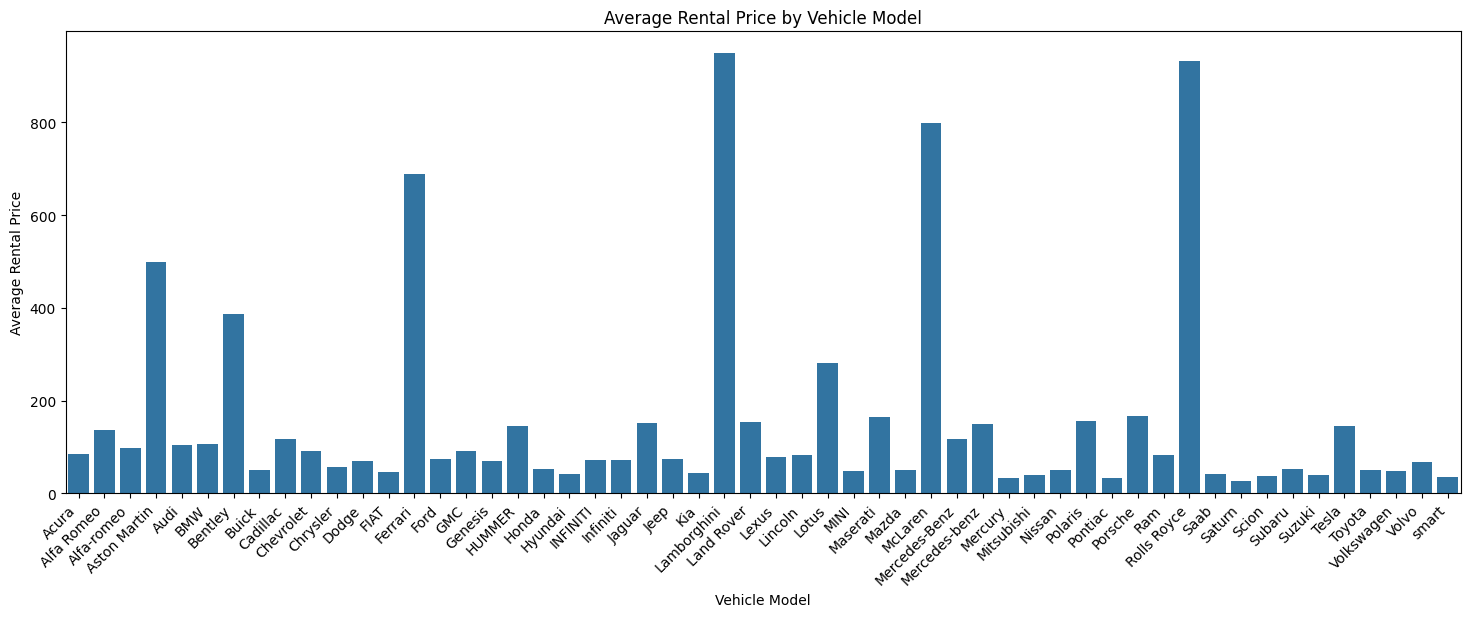

In [ ]:
average_prices = df.groupby('vehicle.make')['rate.daily'].mean()

plt.figure(figsize=(18, 6))

sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Rental Price by Vehicle Model')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Rental Price')
plt.show()

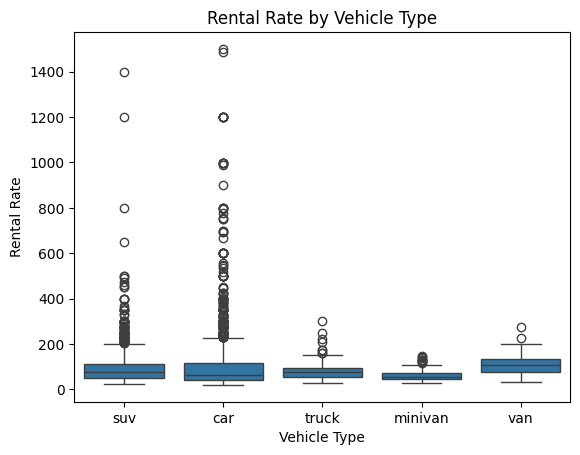

In [ ]:
sns.boxplot(x='vehicle.type', y='rate.daily', data=df)
plt.title('Rental Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Rental Rate')
plt.show()

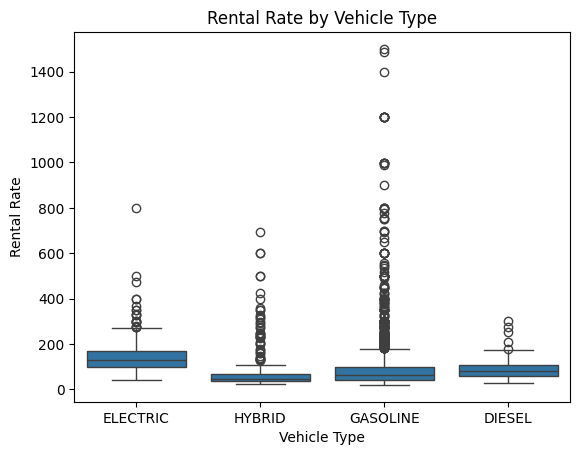

In [ ]:
sns.boxplot(x='fuelType', y='rate.daily', data=df)
plt.title('Rental Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Rental Rate')
plt.show()

In [ ]:
df1['vehicle.year'].value_counts().head(14)

,count
vehicle.year,
2018.0,761
2019.0,700
2017.0,639
2016.0,619
2015.0,578
2014.0,418
2013.0,344
2020.0,268
2012.0,263


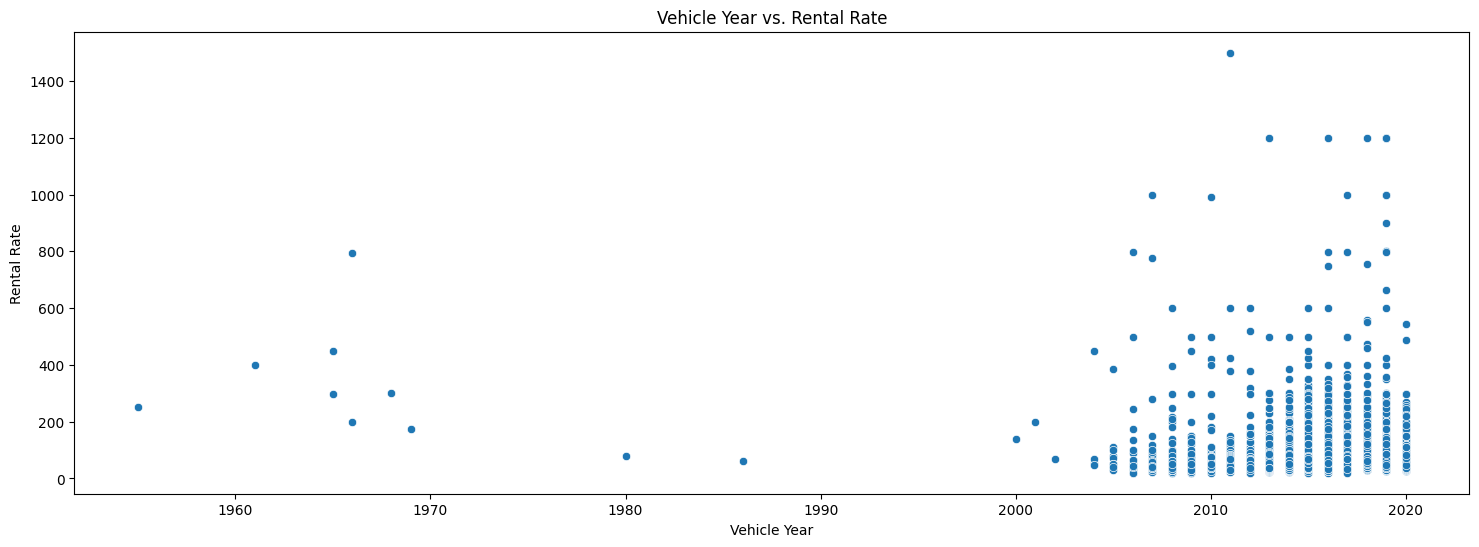

In [ ]:
plt.figure(figsize=(18, 6))

sns.scatterplot(x='vehicle.year', y='rate.daily', data=df1)
plt.title('Vehicle Year vs. Rental Rate')
plt.xlabel('Vehicle Year')
plt.ylabel('Rental Rate')
plt.show()

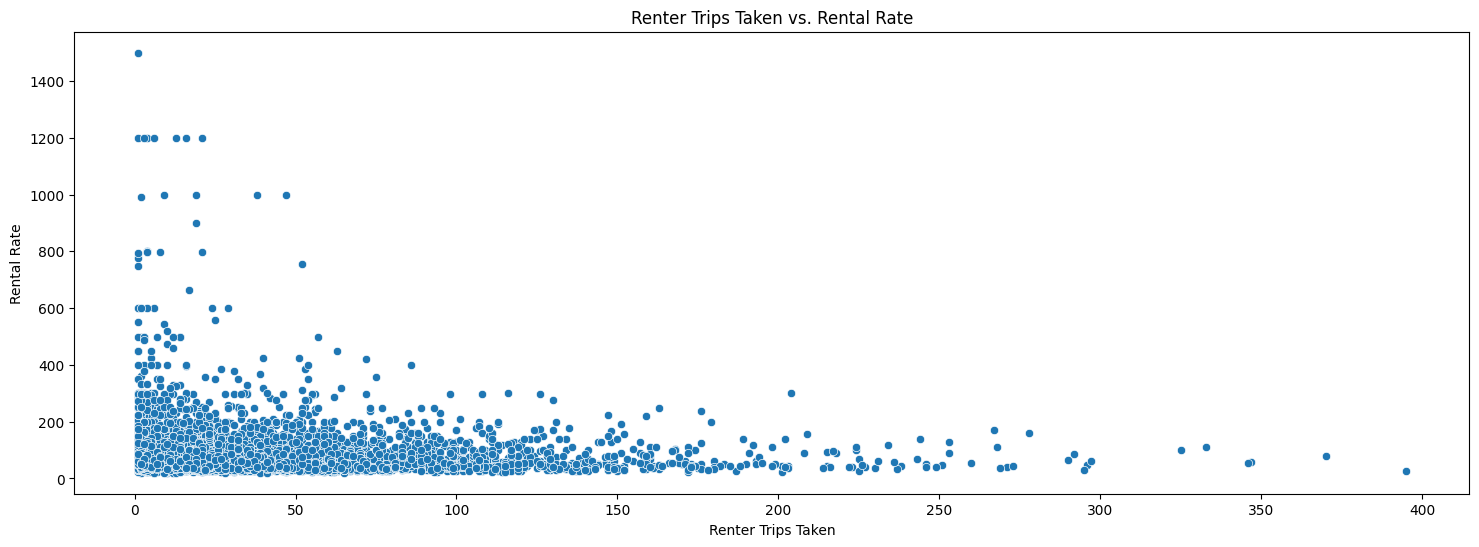

In [ ]:
plt.figure(figsize=(18, 6))

sns.scatterplot(x='renterTripsTaken', y='rate.daily', data=df1)
plt.title('Renter Trips Taken vs. Rental Rate')
plt.xlabel('Renter Trips Taken')
plt.ylabel('Rental Rate')
plt.show()

Missing values in the dataset after initial cleaning:
 fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
airportcity           0
dtype: int64


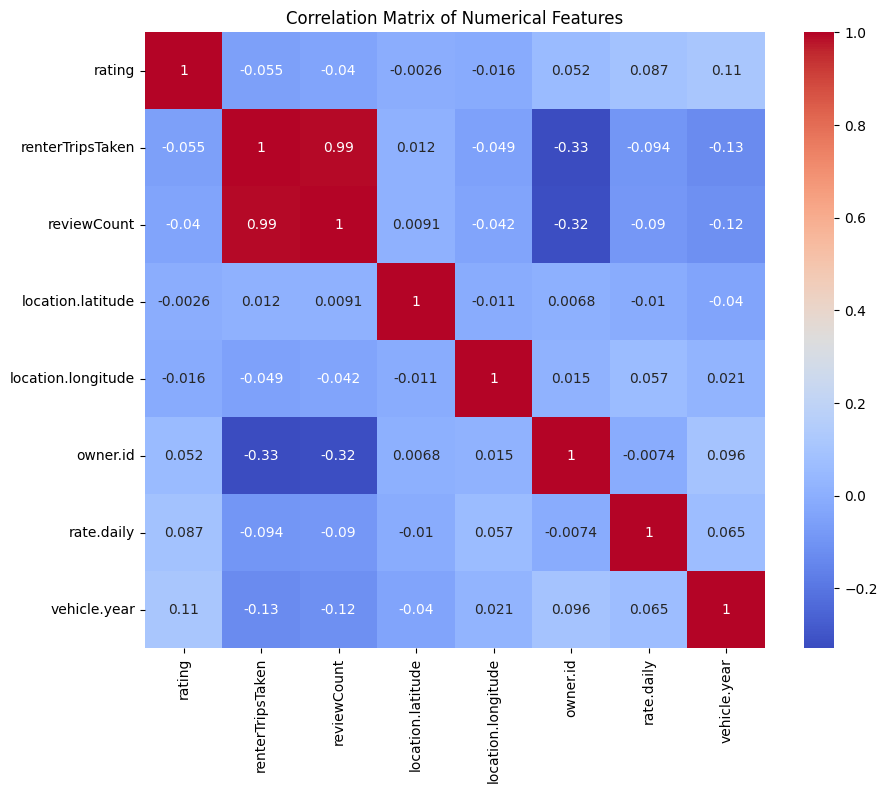

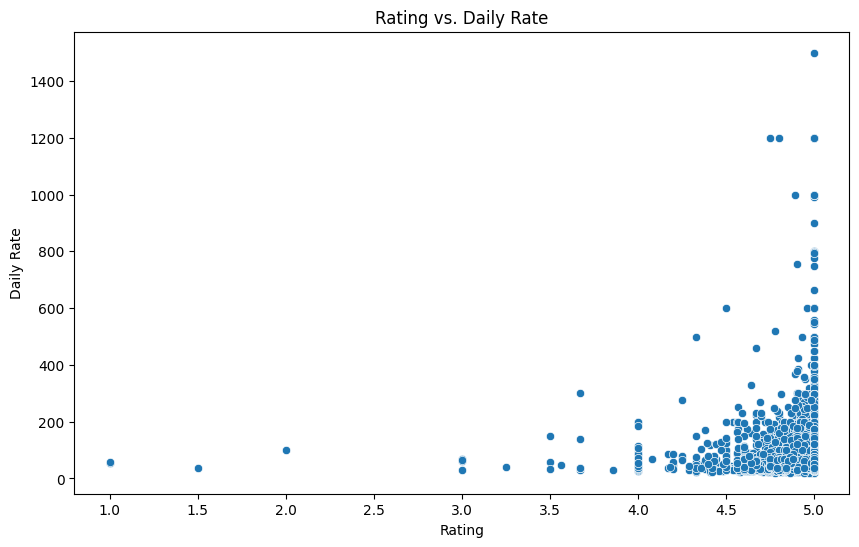

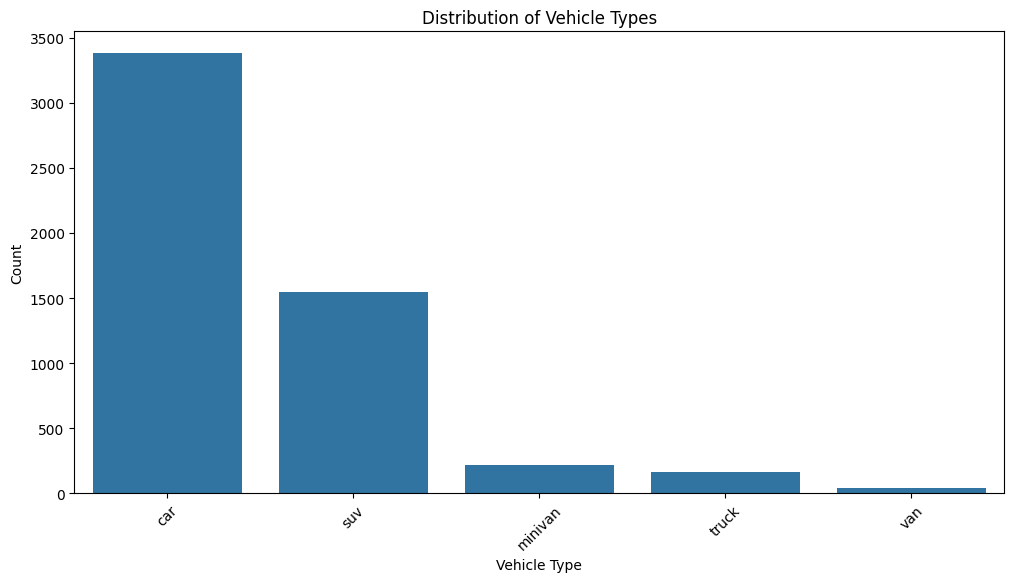

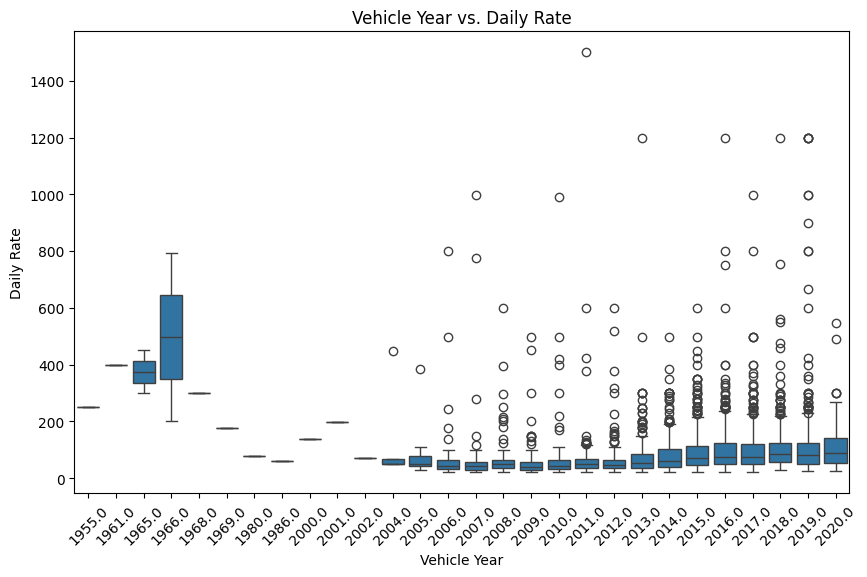

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for any remaining missing values in df1
print("Missing values in the dataset after initial cleaning:\n", df1.isnull().sum())

# Correlation Matrix for Numerical Variables
# Selecting only numeric columns for the correlation matrix
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Relationship between Daily Rate and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='rate.daily', data=df1)
plt.title('Rating vs. Daily Rate')
plt.xlabel('Rating')
plt.ylabel('Daily Rate')
plt.show()

# Countplot of Vehicle Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle.type', data=df1, order=df1['vehicle.type'].value_counts().index)
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship between Vehicle Year and Daily Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle.year', y='rate.daily', data=df1)
plt.title('Vehicle Year vs. Daily Rate')
plt.xlabel('Vehicle Year')
plt.ylabel('Daily Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant features and target variable
X = df1[['rating', 'renterTripsTaken', 'vehicle.year', 'reviewCount']]
y = df1['rate.daily']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Train and evaluate Linear Regression
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting R^2:", r2_score(y_test, y_pred_gb))

Linear Regression MAE: 50.31532237495176
Linear Regression RMSE: 93.39801392472697
Linear Regression R^2: 0.010549611250765256


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest MAE: 56.2404598810485
Random Forest RMSE: 98.97024549939468
Random Forest R^2: -0.11103575667567367


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting MAE: 49.62912773110528
Gradient Boosting RMSE: 92.36102059981029
Gradient Boosting R^2: 0.0323992694259041


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Feature Engineering: Adding Interaction Terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X[['rating', 'renterTripsTaken', 'vehicle.year', 'reviewCount']])

# Scaling features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Tuning Random Forest Hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model_tuned = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_model_tuned.fit(X_poly_scaled, y)

# Best parameters and model evaluation
print("Best parameters for Random Forest:", rf_model_tuned.best_params_)
y_pred_rf_tuned = rf_model_tuned.predict(X_poly_scaled)
print("Tuned Random Forest MAE:", mean_absolute_error(y, y_pred_rf_tuned))
print("Tuned Random Forest RMSE:", mean_squared_error(y, y_pred_rf_tuned, squared=False))
print("Tuned Random Forest R^2:", r2_score(y, y_pred_rf_tuned))

# Trying XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgboost_model.fit(X_poly_scaled, y)
y_pred_xgb = xgboost_model.predict(X_poly_scaled)
print("XGBoost MAE:", mean_absolute_error(y, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y, y_pred_xgb, squared=False))
print("XGBoost R^2:", r2_score(y, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Model Performance Comparison:
            Model        MAE       RMSE       R^2
0   Random Forest  43.400000  78.580000  0.237900
1         XGBoost  42.630000  74.190000  0.320600
2             SVR  43.686699  91.270755 -0.028144
3             KNN  44.118019  79.924660  0.211590
4  Neural Network  43.204175  89.869584  0.003181


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


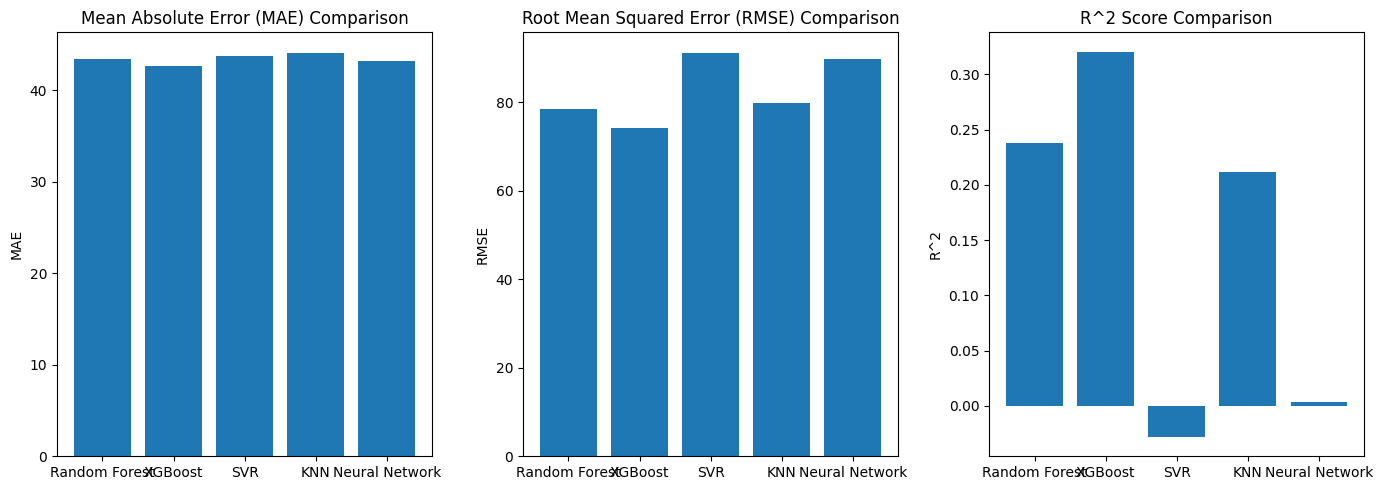

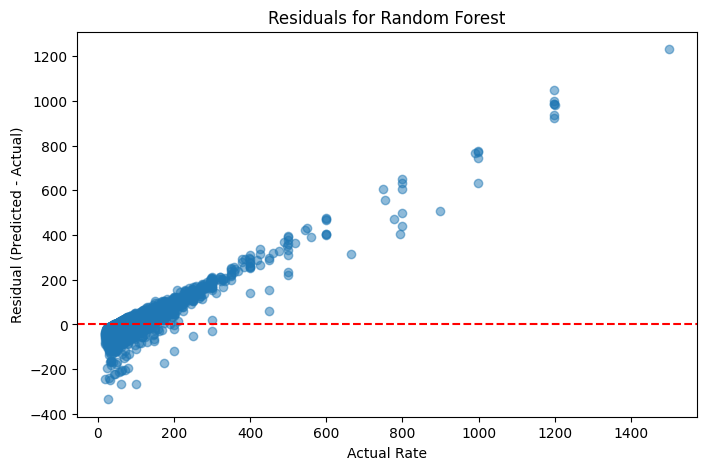

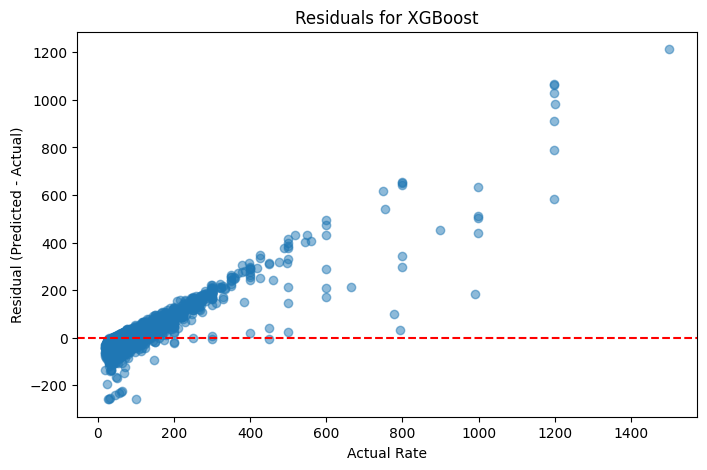

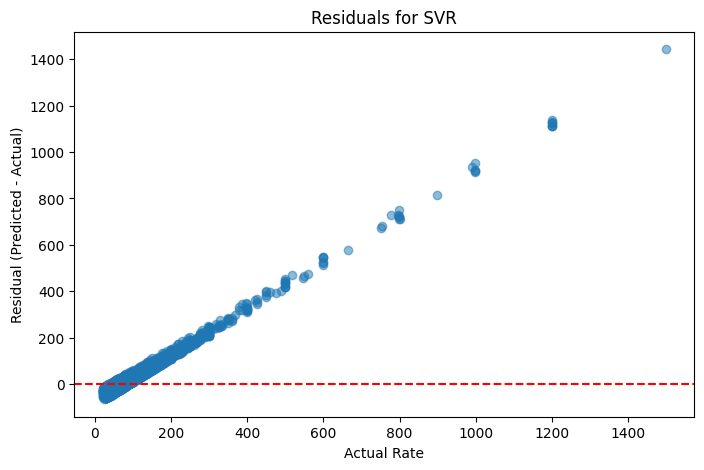

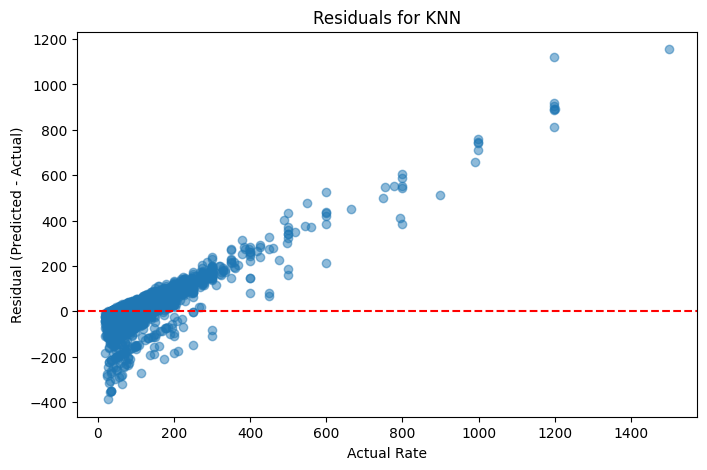

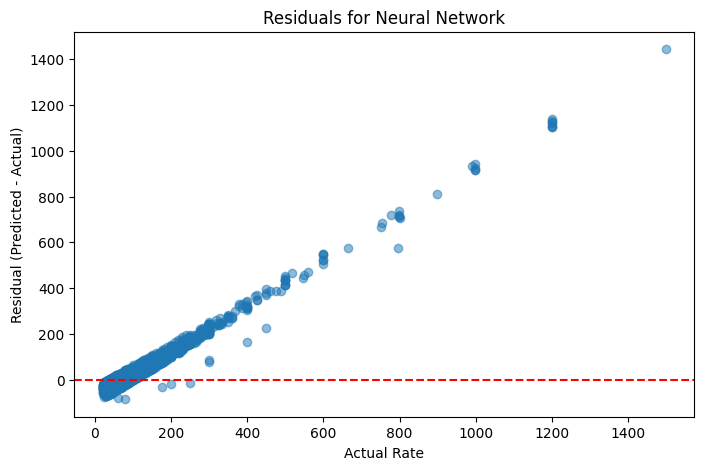

In [ ]:
# Additional imports for models and deep learning
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dictionary to store results
results = {
    "Model": [],
    "MAE": [],
    "RMSE": [],
    "R^2": []
}

# Reuse Random Forest and XGBoost results
results["Model"].extend(["Random Forest", "XGBoost"])
results["MAE"].extend([43.40, 42.63])  # previous results
results["RMSE"].extend([78.58, 74.19])
results["R^2"].extend([0.2379, 0.3206])

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_poly_scaled, y)
y_pred_svr = svr_model.predict(X_poly_scaled)
results["Model"].append("SVR")
results["MAE"].append(mean_absolute_error(y, y_pred_svr))
results["RMSE"].append(mean_squared_error(y, y_pred_svr, squared=False))
results["R^2"].append(r2_score(y, y_pred_svr))

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_poly_scaled, y)
y_pred_knn = knn_model.predict(X_poly_scaled)
results["Model"].append("KNN")
results["MAE"].append(mean_absolute_error(y, y_pred_knn))
results["RMSE"].append(mean_squared_error(y, y_pred_knn, squared=False))
results["R^2"].append(r2_score(y, y_pred_knn))

# Deep Learning Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_poly_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_absolute_error')
nn_model.fit(X_poly_scaled, y, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_poly_scaled).flatten()
results["Model"].append("Neural Network")
results["MAE"].append(mean_absolute_error(y, y_pred_nn))
results["RMSE"].append(mean_squared_error(y, y_pred_nn, squared=False))
results["R^2"].append(r2_score(y, y_pred_nn))

# Convert results to DataFrame for easy visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Display Model Performance Comparison
print("Model Performance Comparison:")
print(results_df)

# Visualization of Model Performance Comparison
import matplotlib.pyplot as plt

# Bar plots for MAE, RMSE, and R^2
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.bar(results_df['Model'], results_df['MAE'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(results_df['Model'], results_df['RMSE'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(results_df['Model'], results_df['R^2'])
plt.title('R^2 Score Comparison')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()

# Residual plots for each model
models = [("Random Forest", y_pred_rf_tuned), ("XGBoost", y_pred_xgb),
          ("SVR", y_pred_svr), ("KNN", y_pred_knn), ("Neural Network", y_pred_nn)]

for model_name, y_pred in models:
    plt.figure(figsize=(8, 5))
    plt.scatter(y, y - y_pred, alpha=0.5)
    plt.title(f'Residuals for {model_name}')
    plt.xlabel('Actual Rate')
    plt.ylabel('Residual (Predicted - Actual)')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Performance Comparison:
               Model        MAE       RMSE       R^2
0  Linear Regression  49.359221  88.829462  0.026122
1      Random Forest  43.400000  78.580000  0.237900
2            XGBoost  42.630000  74.190000  0.320600
3                SVR  43.686699  91.270755 -0.028144
4                KNN  44.118019  79.924660  0.211590
5     Neural Network  43.264566  90.218566 -0.004575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


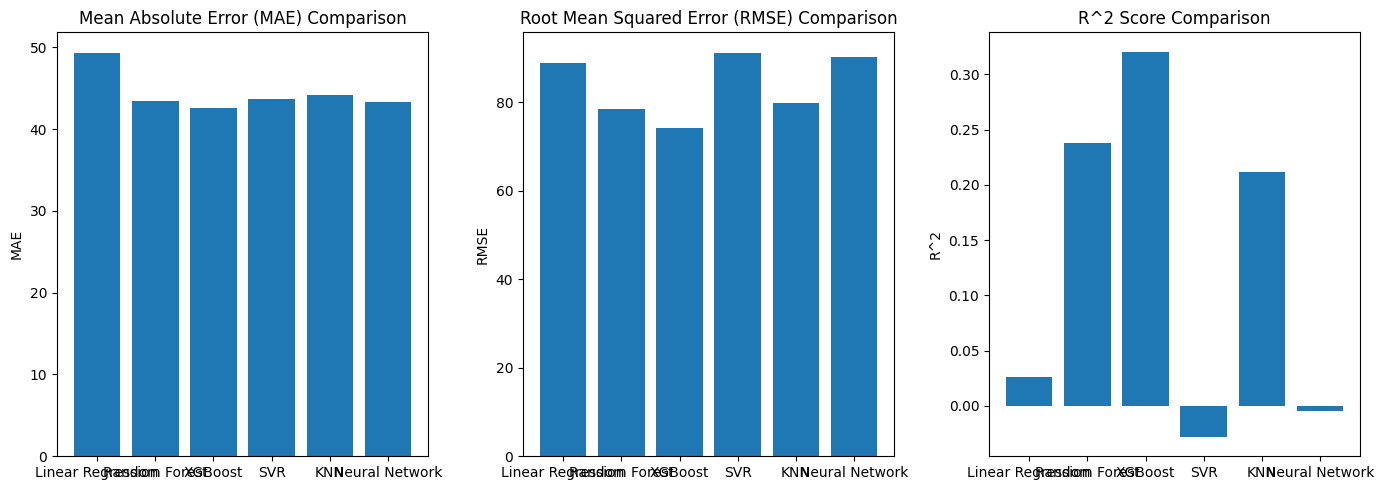

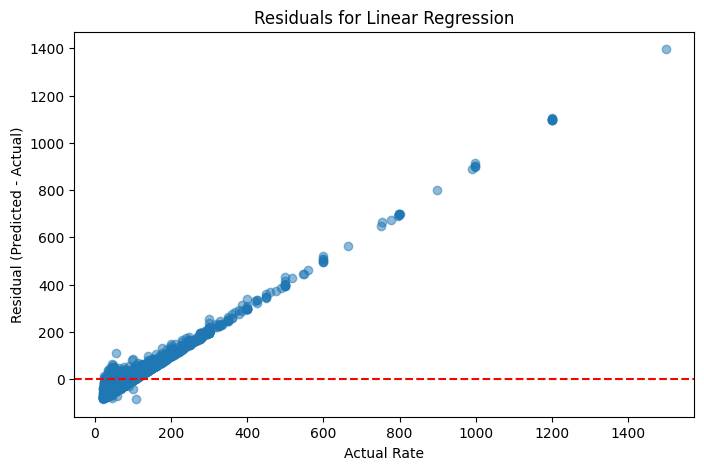

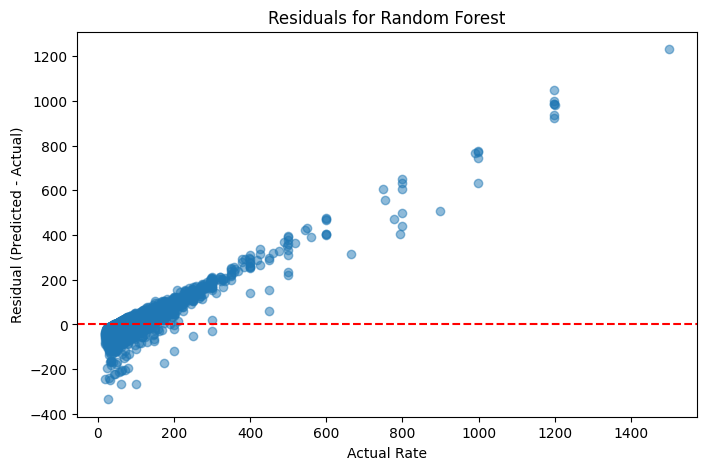

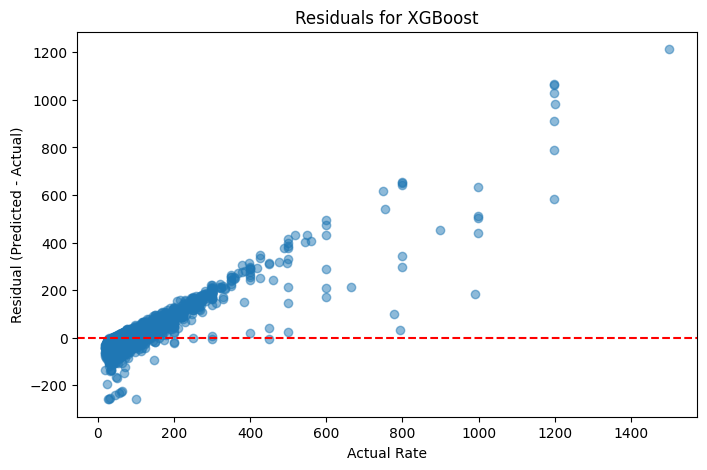

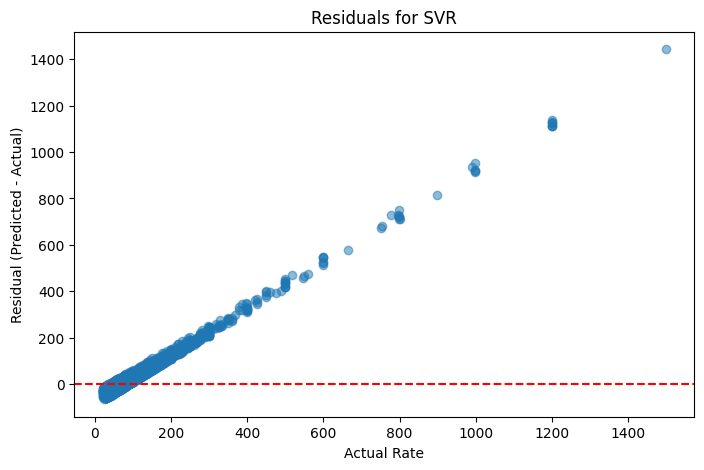

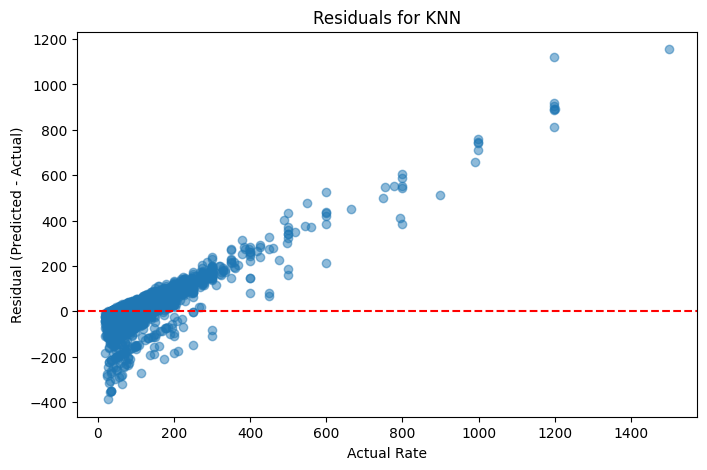

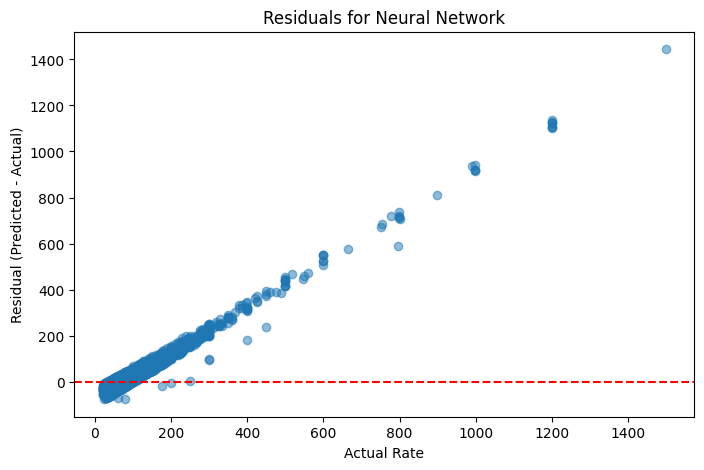

In [ ]:
# Import necessary libraries for the updated models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare results dictionary to store each model's performance
results = {
    "Model": [],
    "MAE": [],
    "RMSE": [],
    "R^2": []
}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_poly_scaled, y)
y_pred_lr = lr_model.predict(X_poly_scaled)
results["Model"].append("Linear Regression")
results["MAE"].append(mean_absolute_error(y, y_pred_lr))
results["RMSE"].append(mean_squared_error(y, y_pred_lr, squared=False))
results["R^2"].append(r2_score(y, y_pred_lr))

# 2. Random Forest (using previous result)
results["Model"].append("Random Forest")
results["MAE"].append(43.40)  # From previous results
results["RMSE"].append(78.58)
results["R^2"].append(0.2379)

# 3. XGBoost (using previous result)
results["Model"].append("XGBoost")
results["MAE"].append(42.63)  # From previous results
results["RMSE"].append(74.19)
results["R^2"].append(0.3206)

# 4. Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_poly_scaled, y)
y_pred_svr = svr_model.predict(X_poly_scaled)
results["Model"].append("SVR")
results["MAE"].append(mean_absolute_error(y, y_pred_svr))
results["RMSE"].append(mean_squared_error(y, y_pred_svr, squared=False))
results["R^2"].append(r2_score(y, y_pred_svr))

# 5. K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_poly_scaled, y)
y_pred_knn = knn_model.predict(X_poly_scaled)
results["Model"].append("KNN")
results["MAE"].append(mean_absolute_error(y, y_pred_knn))
results["RMSE"].append(mean_squared_error(y, y_pred_knn, squared=False))
results["R^2"].append(r2_score(y, y_pred_knn))

# 6. Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_poly_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_absolute_error')
nn_model.fit(X_poly_scaled, y, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_poly_scaled).flatten()
results["Model"].append("Neural Network")
results["MAE"].append(mean_absolute_error(y, y_pred_nn))
results["RMSE"].append(mean_squared_error(y, y_pred_nn, squared=False))
results["R^2"].append(r2_score(y, y_pred_nn))

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Display Model Performance Comparison
print("Model Performance Comparison:")
print(results_df)

# Visualization of Model Performance Comparison
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.bar(results_df['Model'], results_df['MAE'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(results_df['Model'], results_df['RMSE'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(results_df['Model'], results_df['R^2'])
plt.title('R^2 Score Comparison')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()

# Residual plots for each model
models = [
    ("Linear Regression", y_pred_lr),
    ("Random Forest", y_pred_rf_tuned),
    ("XGBoost", y_pred_xgb),
    ("SVR", y_pred_svr),
    ("KNN", y_pred_knn),
    ("Neural Network", y_pred_nn)
]

for model_name, y_pred in models:
    plt.figure(figsize=(8, 5))
    plt.scatter(y, y - y_pred, alpha=0.5)
    plt.title(f'Residuals for {model_name}')
    plt.xlabel('Actual Rate')
    plt.ylabel('Residual (Predicted - Actual)')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()